In [1]:
import tensorflow as tf

tf.keras.applications.MobileNetV3Small(
    input_shape=None,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation='softmax',
    include_preprocessing=True
)



C:\Users\saulo\AppData\Roaming\Python\Python312\site-packages\keras\src\applications\mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


10734624/10734624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


<Functional name=MobileNetV3Small, built=True>

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os

In [21]:
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf

data_dir = "MangoLeaf"
img_size = (224, 224)
batch_size = 32
seed = 123

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

rest_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

rest_batches = tf.data.experimental.cardinality(rest_ds).numpy()
val_batches = rest_batches // 2

val_ds = rest_ds.take(val_batches)
test_ds = rest_ds.skip(val_batches)

class_names = train_ds.class_names
print("Classes:", class_names)

Found 4000 files belonging to 8 classes.
Using 3200 files for training.
Found 4000 files belonging to 8 classes.
Using 800 files for validation.
Classes: ['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [22]:
base_model = tf.keras.applications.MobileNetV3Small(
    input_shape=None,
    alpha=1.0,
    minimalistic=False,
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation='softmax',
    include_preprocessing=True
)
base_model.trainable = False  # Fine-tune later if needed

inputs = tf.keras.Input(shape=img_size + (3,))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(len(class_names), activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\saulo\AppData\Roaming\Python\Python312\site-packages\keras\src\applications\mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


In [23]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         4,616 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 943,736 (3.60 MB)

 Trainable params: 4,616 (18.03 KB)

 Non-trainable params: 939,120 (3.58 MB)

In [24]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 222ms/step - accuracy: 0.5601 - loss: 1.3261 - val_accuracy: 0.9766 - val_loss: 0.2464
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.9564 - loss: 0.2543 - val_accuracy: 0.9948 - val_loss: 0.1303
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 219ms/step - accuracy: 0.9788 - loss: 0.1494 - val_accuracy: 0.9948 - val_loss: 0.0869
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 217ms/step - accuracy: 0.9848 - loss: 0.1042 - val_accuracy: 0.9974 - val_loss: 0.0613
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 345ms/step - accuracy: 0.9830 - loss: 0.0821 - val_accuracy: 0.9974 - val_loss: 0.0535
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.9877 - loss: 0.0657 - val_accuracy: 1.0000 - val_loss: 0.0409
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 253ms/step - accuracy: 0.9902 - loss: 0.0559 - val_accuracy: 1.0000 - val_loss: 0.0351
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 337ms/step - accuracy: 0.9960 - loss: 0.0434 - val

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.9988 - loss: 0.0249
Validation accuracy: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


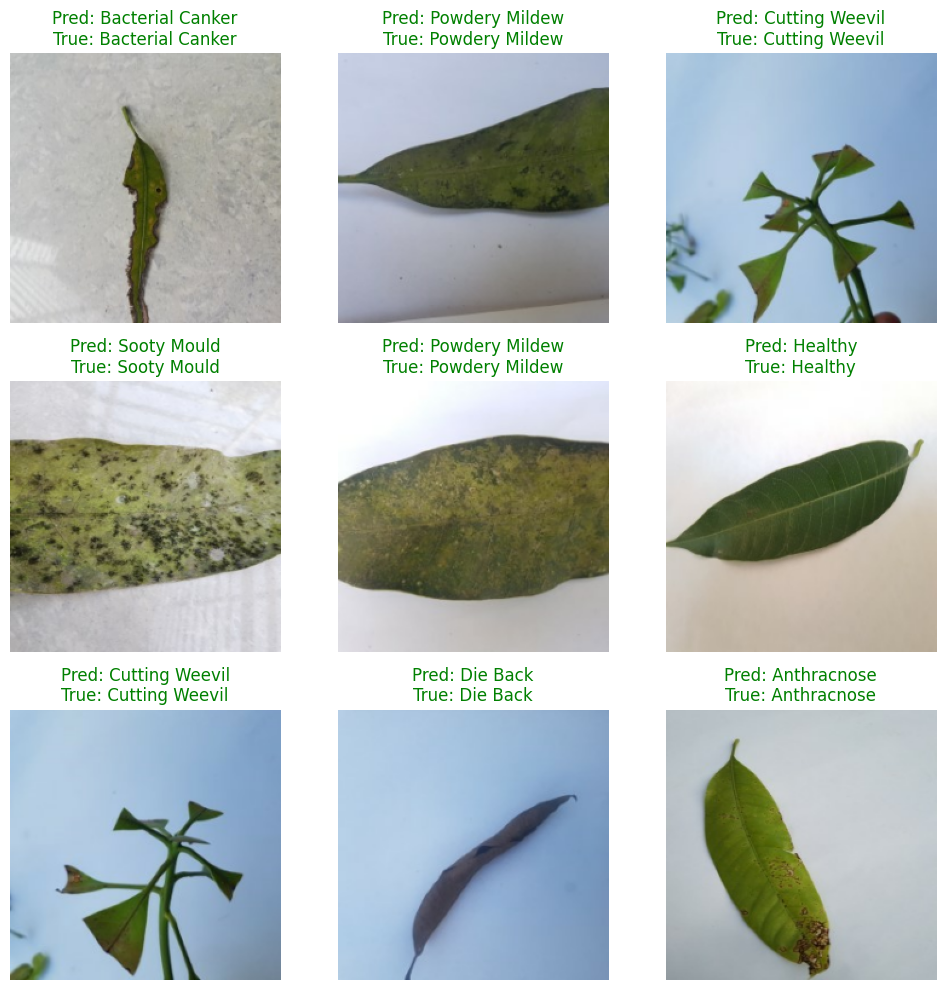

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       1.00      1.00      1.00        59
Bacterial Canker       1.00      1.00      1.00        44
  Cutting Weevil       1.00      1.00      1.00        53
        Die Back       1.00      1.00      1.00        52
      Gall Midge       0.98      1.00      0.99        45
         Healthy       1.00      1.00      1.00        56
  Powdery Mildew       1.00      1.00      1.00        59
    

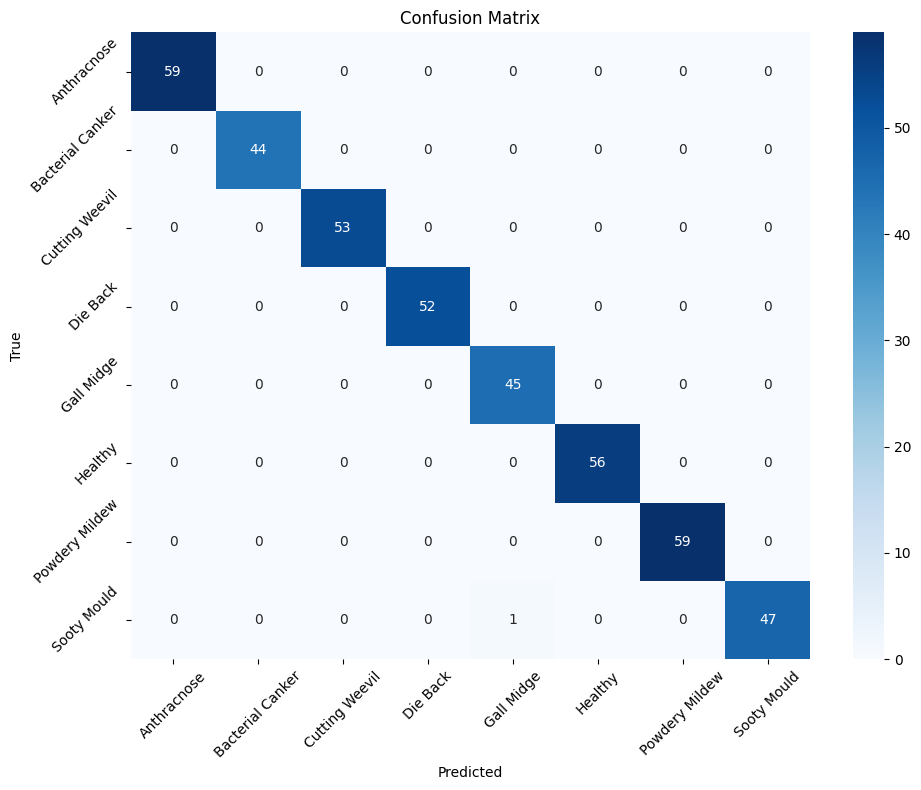

In [25]:
loss, acc = model.evaluate(test_ds)
print(f"Validation accuracy: {acc:.2f}")

# Test on individual images
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of validation images
test_images, test_labels = next(iter(test_ds))

# Make predictions
predictions = model.predict(test_images)

# Plot a grid of images with their predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].numpy().astype("uint8"))
    predicted_class = class_names[np.argmax(predictions[i])]
    true_class = class_names[test_labels[i]]
    color = 'green' if predicted_class == true_class else 'red'
    plt.title(f'Pred: {predicted_class}\nTrue: {true_class}', color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print classification report
from sklearn.metrics import classification_report
y_pred = []
y_true = []

for images, labels in test_ds:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# Save the model in SavedModel format
model.save('mobilenetv3_model.keras')

# Save the model weights
model.save_weights('mobilenetv3_weights.weights.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


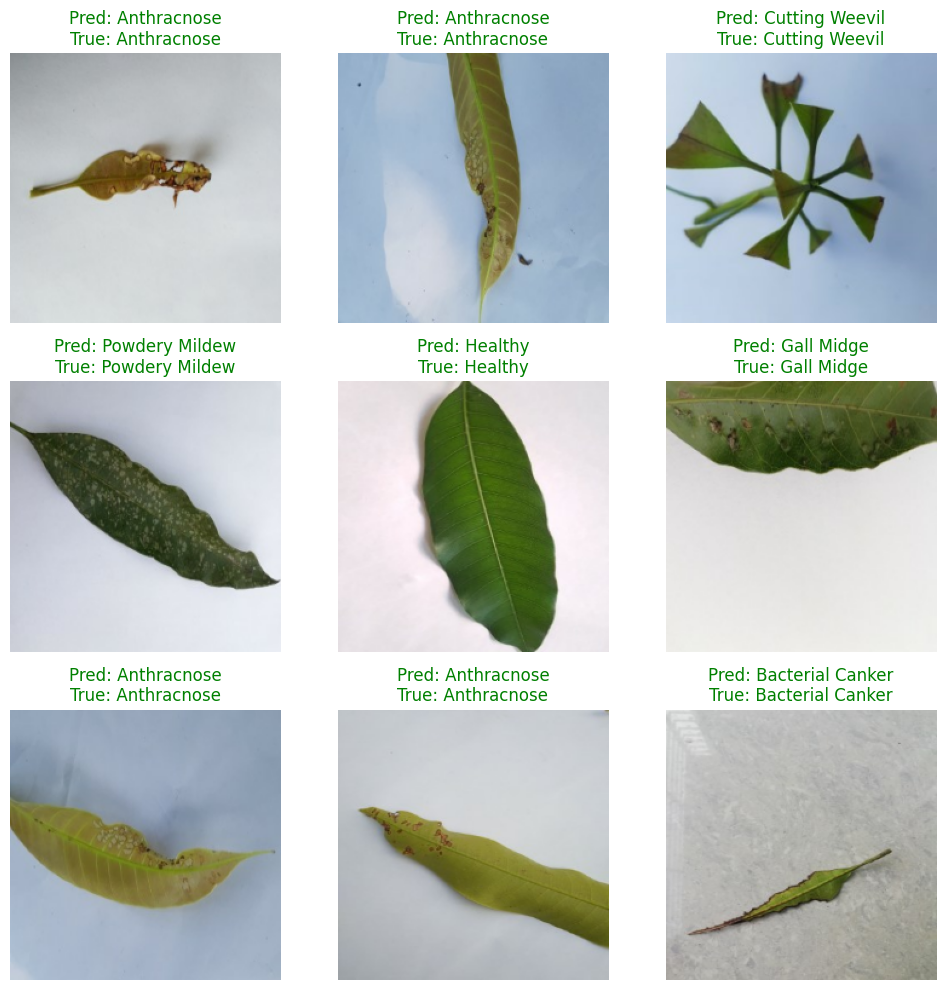

In [20]:
model = tf.keras.models.load_model('models/mobilenetv3_model.keras')

predictions = model.predict(test_images)

# Plot a grid of images with their predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].numpy().astype("uint8"))
    predicted_class = class_names[np.argmax(predictions[i])]
    true_class = class_names[test_labels[i]]
    color = 'green' if predicted_class == true_class else 'red'
    plt.title(f'Pred: {predicted_class}\nTrue: {true_class}', color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()
